**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



In [4]:
txt_region = "fcc_astarr_macs_input_overlap"
txt_fdiry  = file.path(FD_RES, "region_integration", txt_region)
txt_fname  = "result.test.ranknom.module.gsea_v2.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath)
dat_res_gsea = dat
head(dat, 3)

Rows: 70 Columns: 8
── Column specification ───────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): pathway
dbl (6): pval, padj, log2err, ES, NES, size
lgl (1): leadingEdge

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


pathway,pval,padj,log2err,ES,NES,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
Module_01,4.007230e-112,1.626464e-111,0.4543564,0.3488813,2.238566,4799,NA
Module_02,NA,NA,NA,-0.3460024,NA,9682,NA
Module_03,1.651872e-36,3.453915e-36,0.2573257,0.3124394,1.963153,2303,NA


In [5]:
txt_region = "fcc_astarr_macs_input_overlap"
txt_fdiry  = file.path(FD_RES, "region_integration", txt_region)
txt_fname  = "result.test.ranknom.module.wcox.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath)
dat_res_wcox = dat
head(dat, 3)

Rows: 70 Columns: 7
── Column specification ───────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Group
dbl (6): Label_0, Label_1, Diff, pval, padj, nlog10p

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Group,Label_0,Label_1,Diff,pval,padj,nlog10p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Module_01,0.4794890,0.5790634,0.09957438,5.262701e-131,2.046606e-130,129.68897
Module_02,0.5073438,0.3927478,-0.11459605,0.000000e+00,0.000000e+00,Inf
Module_03,0.4844436,0.5625887,0.07814511,1.571698e-43,3.333906e-43,42.47705


In [20]:
dat = dat_res_gsea
dat = dat %>% dplyr::select(pathway, NES, padj)
colnames(dat) = c("Module", "NES", "Padj_GSEA")
dat = dat %>% dplyr::mutate(Rank_NES = rank(NES), Rank_Padj_GSEA = rank(Padj_GSEA))
dat1 = dat

dat = dat_res_wcox
dat = dat %>% dplyr::select(Group, Diff, padj)
colnames(dat) = c("Module", "Diff", "Padj_WCOX")
dat = dat %>% dplyr::mutate(Rank_Diff = rank(Diff), Rank_Padj_WCOX = rank(Padj_WCOX))
dat2 = dat

dat_res_merge = dplyr::left_join(dat1, dat2, by = "Module")

In [21]:
dat = dat_res_merge
head(dat)

Module,NES,Padj_GSEA,Rank_NES,Rank_Padj_GSEA,Diff,Padj_WCOX,Rank_Diff,Rank_Padj_WCOX
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Module_01,2.238566,1.626464e-111,48,17,0.09957438,2.046606e-130,45,18.0
Module_02,NA,NA,70,70,-0.11459605,0.000000e+00,1,2.5
Module_03,1.963153,3.453915e-36,34,33,0.07814511,3.333906e-43,32,33.0
Module_04,1.955139,2.999403e-56,33,27,0.07643769,8.553121e-68,29,27.0
Module_05,1.968653,2.265498e-34,35,34,0.07941261,3.592909e-43,33,34.0
Module_06,2.176726,3.280680e-122,46,15,0.09594647,4.213572e-140,41,17.0


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


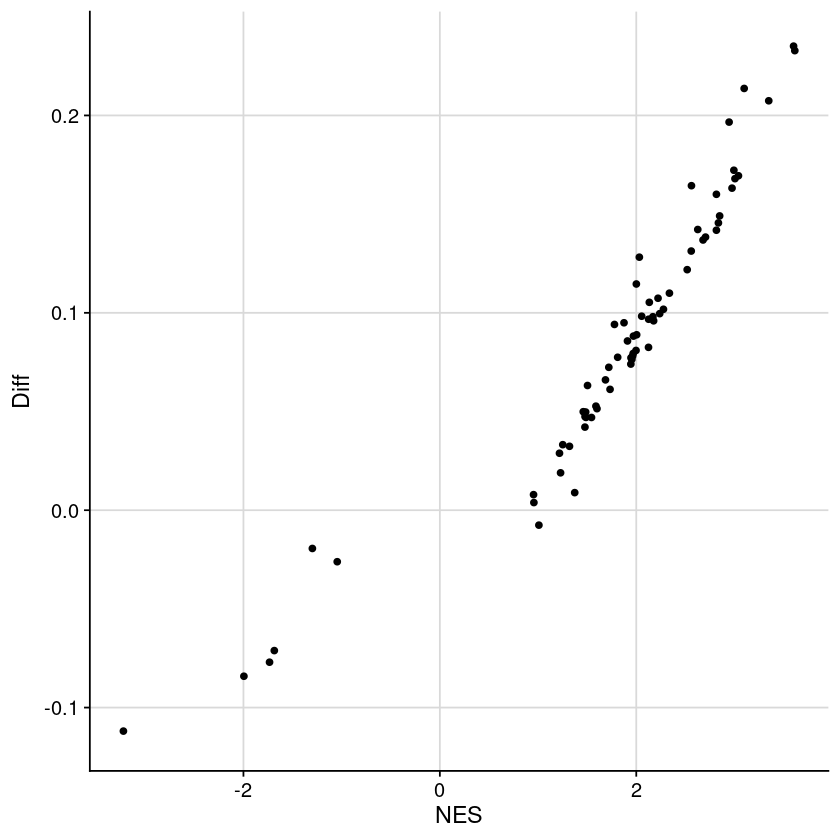

In [22]:
gpt = ggplot(dat, aes(x=NES, y=Diff)) + geom_point() + theme_cowplot() + background_grid()
print(gpt)

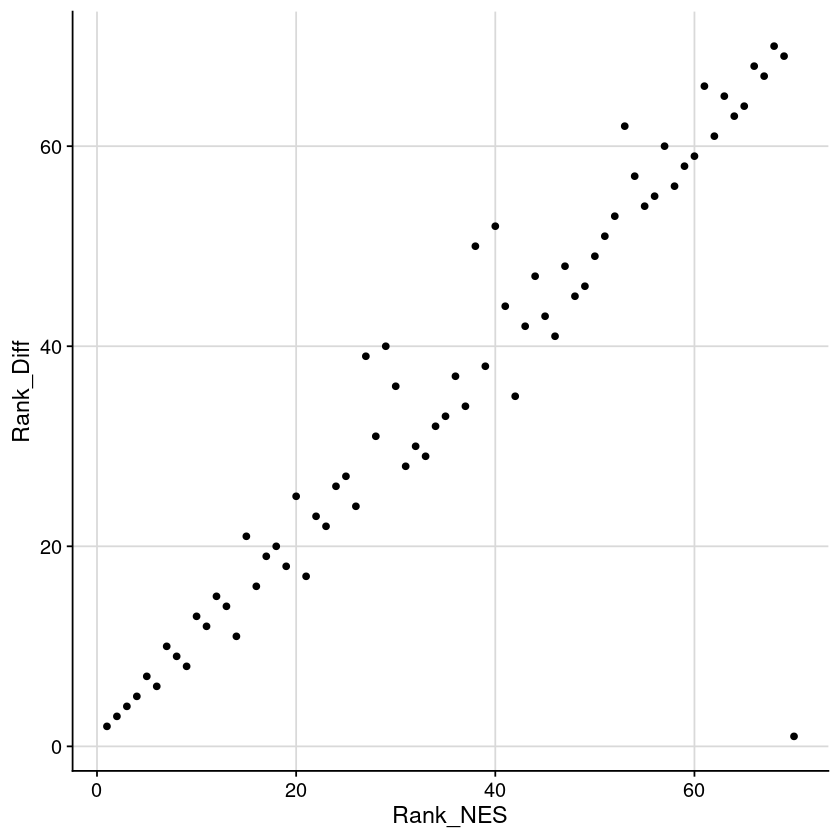

In [23]:
gpt = ggplot(dat, aes(x=Rank_NES, y=Rank_Diff)) + 
    geom_point() + 
    theme_cowplot() + 
    background_grid()
print(gpt)

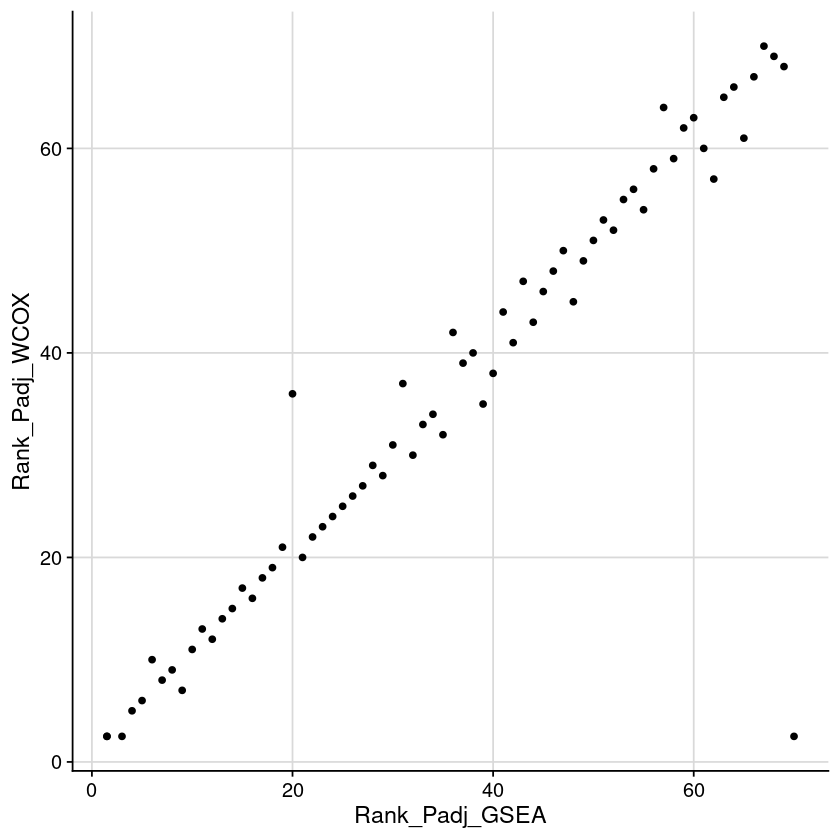

In [24]:
gpt = ggplot(dat, aes(x=Rank_Padj_GSEA, y=Rank_Padj_WCOX)) + 
    geom_point() + 
    theme_cowplot() + 
    background_grid()
print(gpt)